In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
train_data = pd.read_csv("inputs/train.csv")
test_data = pd.read_csv("inputs/test.csv")
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


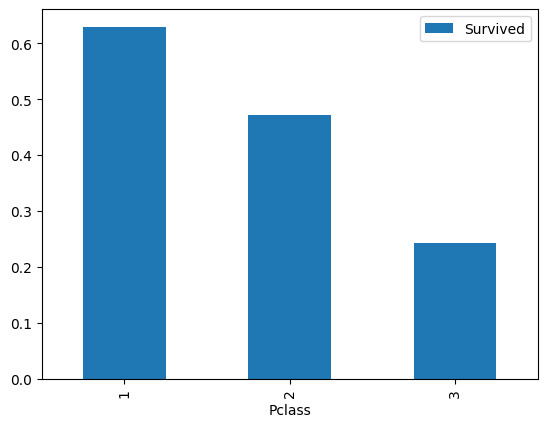

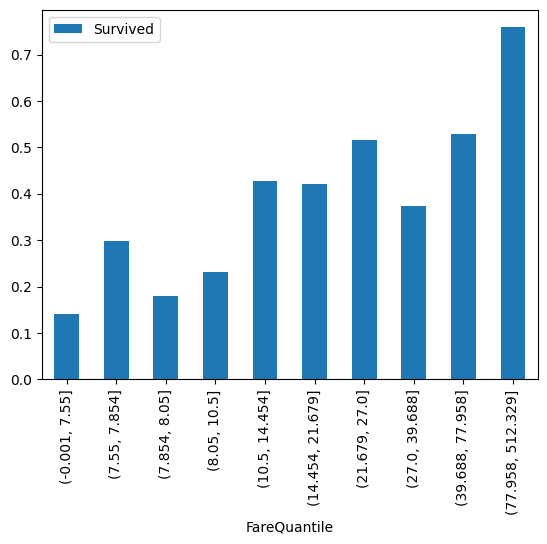

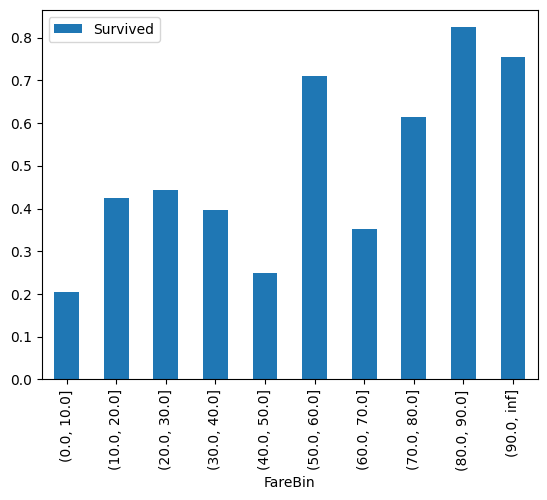

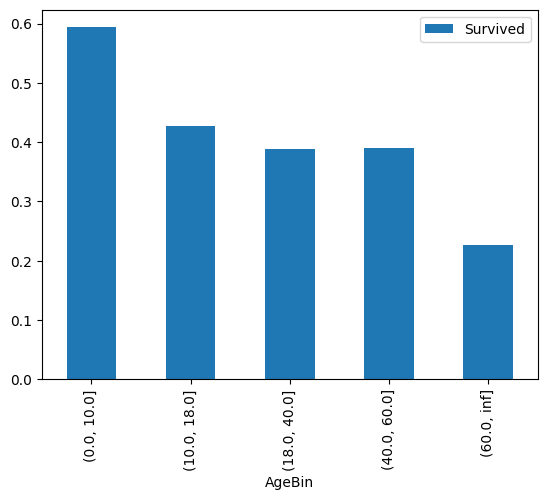

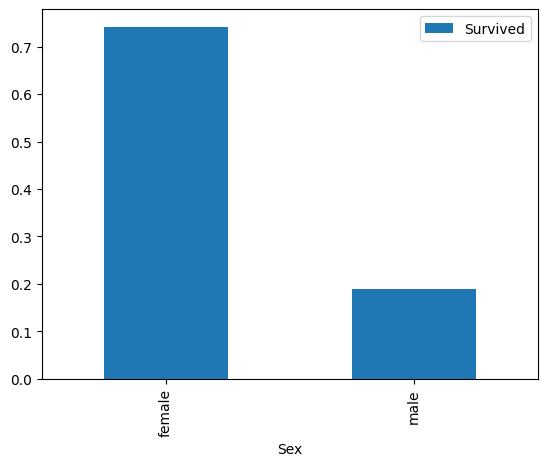

In [54]:

## Data Visualization

#= Pclass survival
train_data[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot(kind='bar')
plt.show()
#= Fare survival
# group into percentile
train_data['FareQuantile'] = pd.qcut(train_data['Fare'], 10)
train_data[['FareQuantile', 'Survived']].groupby(['FareQuantile'], observed=True).mean().plot(kind='bar')
plt.show()
#* Binned
train_data['FareBin'] = pd.cut(train_data['Fare'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, np.inf])
train_data[['FareBin', 'Survived']].groupby(['FareBin'], observed=True).mean().plot(kind='bar')
#= Age survival
#* Binned
train_data['AgeBin'] = pd.cut(train_data['Age'], bins=[0, 10, 18, 40, 60, np.inf])
train_data[['AgeBin', 'Survived']].groupby(['AgeBin'], observed=True).mean().plot(kind='bar')

#= Sex survival
train_data[['Sex', 'Survived']].groupby('Sex').mean().plot(kind='bar')
plt.show()


/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


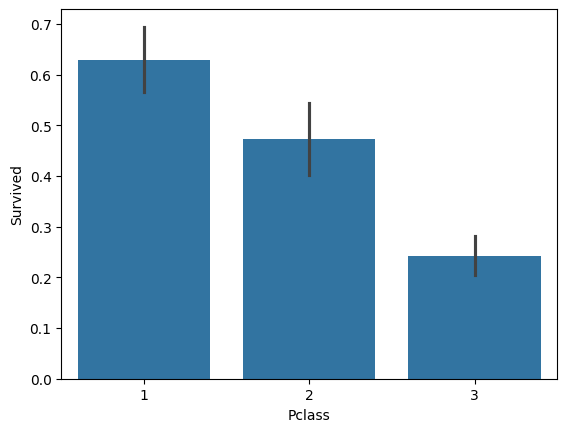

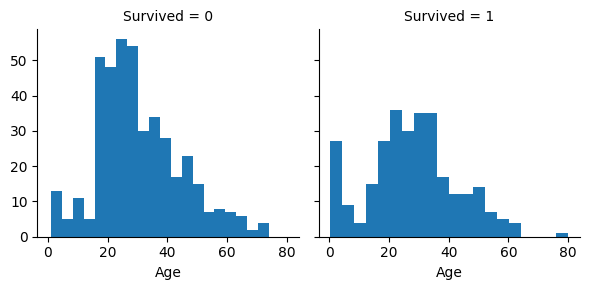

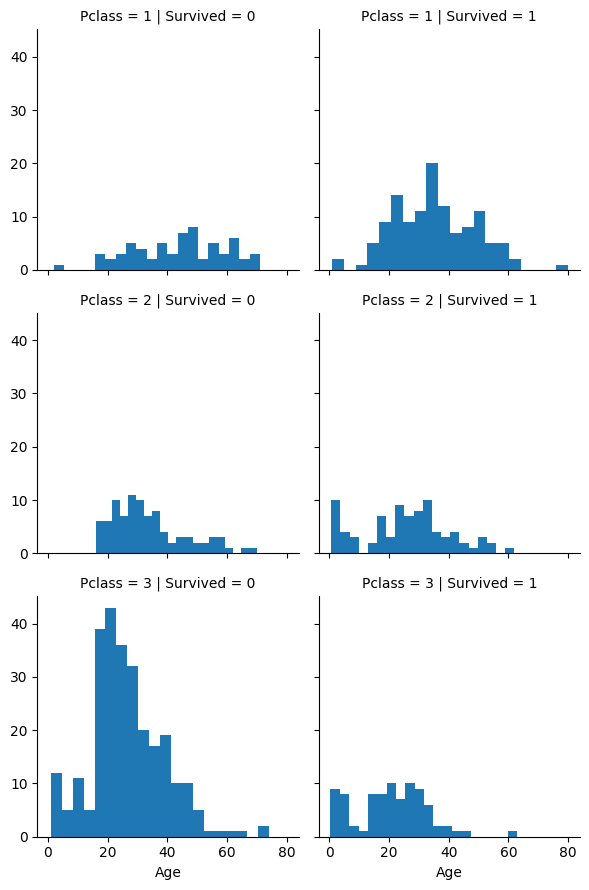

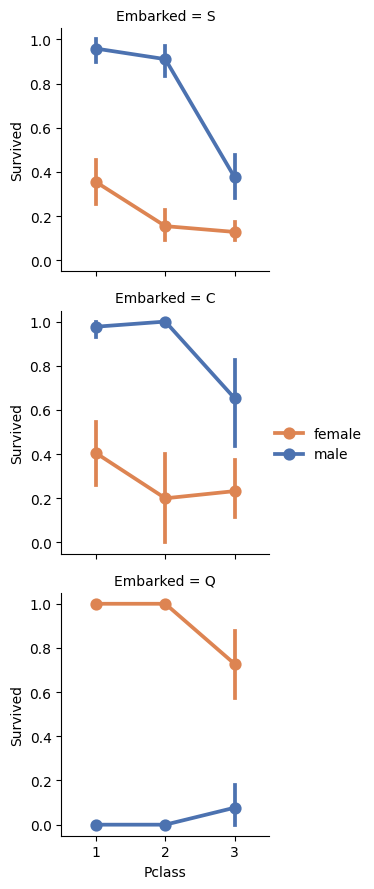

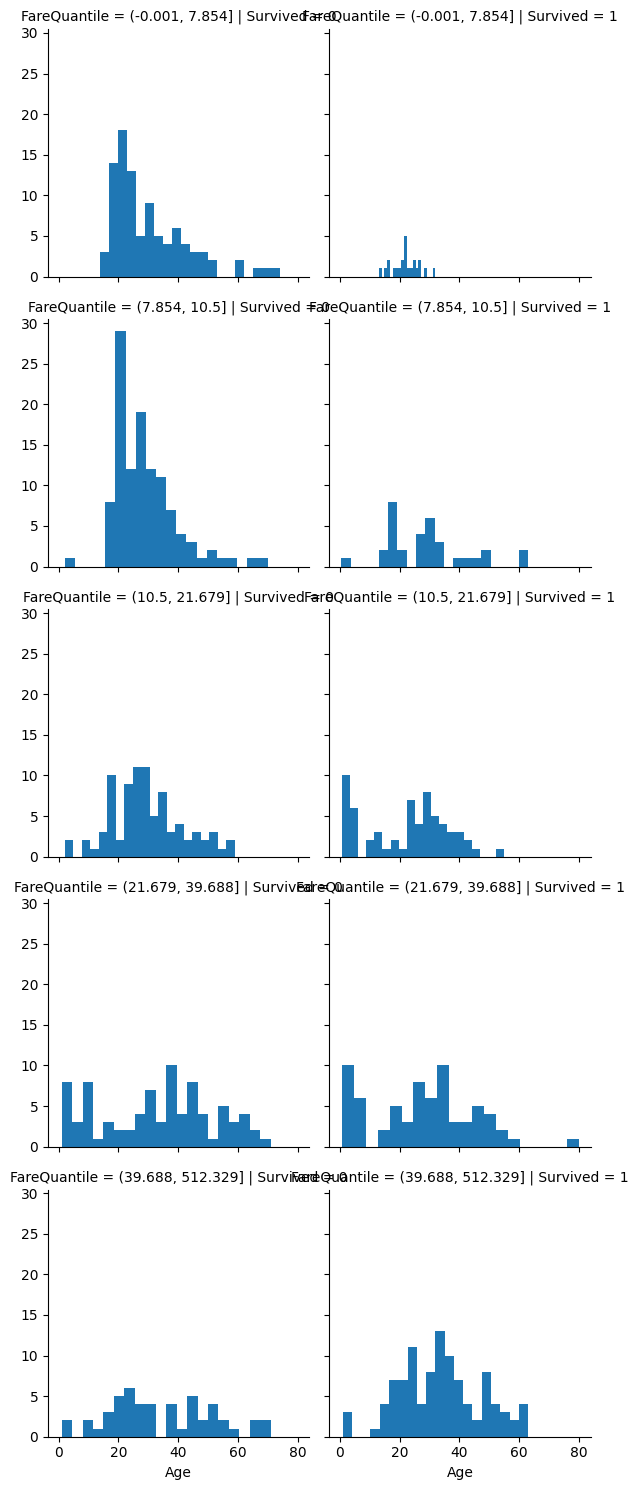

In [53]:

## Seaborn Data Visualization

#* Pclass survival
sns.barplot(x='Pclass', y='Survived', data=train_data)
sns.FacetGrid(train_data, col='Survived').map(plt.hist, 'Age', bins=20)
sns.FacetGrid(train_data, col='Survived', row='Pclass').map(plt.hist, 'Age', bins=20)

sns.FacetGrid(train_data, row='Embarked').map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep').add_legend()

#* Fare survival


In [51]:

## Preprocessing ###############################################################
################################################################################
X_train = train_data
Y_train = train_data['Survived']
X_train_cat = X_train.select_dtypes(include=[object])
X_train_num = X_train.select_dtypes(include=[np.number])
X_test = test_data
female = train_data[train_data['Sex']=='female']
male   = train_data[train_data['Sex']=='male']

#
female_Survived = female['Survived']
male_Survived = male['Survived']
# print(sum(female_Survived)/len(female_Survived))
# print(sum(male_Survived)/len(male_Survived))

#= Adding new features =========================================================
def get_bin_index(x, bins):
	return np.digitize(x, bins=bins)

def add_new_features(df, print_survived=False):
	#* AgeBin
	age_bin = [0, 10, 18, 40, 60, np.inf]
	fair_bin = [0, 10, 20, 30, 40, 50, 60, 70, np.inf]
	df['AgeBin'] = df['Age'].apply(lambda x: get_bin_index(x, bins=age_bin))
	df['FareBin'] = df['Fare'].apply(lambda x: get_bin_index(x, bins=fair_bin))
	#* FamilySize
	df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
	#* IsAlone
	df['IsAlone'] = 0
	df.loc[df['FamilySize']==1, 'IsAlone'] = 1

	if print_survived:
		print(df[['AgeBin', 'Survived']].groupby(['AgeBin'], observed=True).mean().sort_values(by='Survived', ascending=False))
		print(df[['FareBin', 'Survived']].groupby(['FareBin'], observed=True).mean().sort_values(by='Survived', ascending=False))
		print(df[['FamilySize', 'Survived']].groupby(['FamilySize'], observed=True).mean().sort_values(by='Survived', ascending=False))
		print(df[['IsAlone', 'Survived']].groupby(['IsAlone'], observed=True).mean().sort_values(by='Survived', ascending=False))


add_new_features(X_train, True)
add_new_features(X_test)

#= Label Encoding =============================================================
from sklearn.preprocessing import FunctionTransformer

# Define the function that will be used for the transformation
def map_string(s):
    return np.where(pd.isnull(s), 0, 1)


# Create the transformer
cat_binary_transformer = FunctionTransformer(map_string, feature_names_out='one-to-one')


#= One Hot Encoding ===========================================================
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
# cat_encoder = OneHotEncoder(handle_unknown='ignore')
# X_train_cat_prep = cat_encoder.fit_transform(X_train_cat).toarray()
# X_train_cat_prep = pd.DataFrame(X_train_cat_prep, columns=cat_encoder.get_feature_names_out())
# print(X_train_cat_prep.head())

#= Replace the missing value with median =======================================
from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy="median")
# X_train_num_prep = imputer.fit_transform(X_train_num)
# X_train_num_prep = pd.DataFrame(X_train_num_prep, columns=imputer.get_feature_names_out())
# print(X_train_num_prep.head())

#= Combine the two =============================================================
# X_train_prep = pd.concat([X_train_cat_prep, X_train_num_prep], axis=1)
# print(X_train_prep.head())


#= Pipeline ====================================================================
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder

num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             StandardScaler(),
							#  MinMaxScaler(),
                    		)
num_pipeline_bin = make_pipeline(
								# SimpleImputer(strategy="median"),
							 	OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1 ),
                                # StandardScaler()
							 )

# cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                             OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1 ))
cat_binary_pipeline = make_pipeline(cat_binary_transformer)

# bucketing cabin into HasCabin and NoCabin
# from sklearn.preprocessing import KBinsDiscretizer
# cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'),
# 							 KBinsDiscretizer(n_bins=2, encode='onehot-dense'))

# X_train_num_prep = num_pipeline.fit_transform(X_train_num)

# X_train_num_prep = num_pipeline.fit_transform(X_train)
# X_train_num_prep = pd.DataFrame(X_train_num_prep, columns=num_pipeline.get_feature_names_out())
# X_train_cat_prep = cat_pipeline.fit_transform(X_train).toarray()
# X_train_cat_prep = pd.DataFrame(X_train_cat_prep, columns=cat_pipeline.get_feature_names_out())
# X_train_num_prep.head()
# X_train_cat_prep.head()

#* Manually select the columns
preprocess_pipeline = make_column_transformer(
	(num_pipeline, ['Age', 'Fare', 'Pclass', 'Parch', 'SibSp', 'FamilySize', 'IsAlone']),
	(num_pipeline_bin, ['AgeBin', 'FareBin']),
	(cat_pipeline, ['Sex']),
	# (cat_binary_pipeline, ['Cabin'])
)

#* Automatically select the columns
# preprocess_pipeline = make_column_transformer(
# 	(num_pipeline, make_column_selector(dtype_include=np.number)),
# 	(cat_pipeline, make_column_selector(dtype_include=object))
# )

X_train_prep = preprocess_pipeline.fit_transform(X_train)
X_train_prep = pd.DataFrame(X_train_prep, columns=preprocess_pipeline.get_feature_names_out())
X_train_prep.head(10)

        Survived
AgeBin          
1       0.612903
2       0.450980
4       0.394161
3       0.383562
6       0.293785
5       0.269231
         Survived
FareBin          
8        0.723810
6        0.692308
4        0.437500
3        0.426471
2        0.424581
7        0.352941
5        0.266667
1        0.199405
            Survived
FamilySize          
4           0.724138
3           0.578431
2           0.552795
7           0.333333
1           0.303538
5           0.200000
6           0.136364
8           0.000000
11          0.000000
         Survived
IsAlone          
0        0.505650
1        0.303538


,pipeline-1__Age,pipeline-1__Fare,pipeline-1__Pclass,pipeline-1__Parch,pipeline-1__SibSp,pipeline-1__FamilySize,pipeline-1__IsAlone,pipeline-2__AgeBin,pipeline-2__FareBin,pipeline-3__Sex
0,-0.565736,-0.502445,0.827377,-0.473674,0.432793,0.059160,-1.231645,2.0,0.0,1.0
1,0.663861,0.786845,-1.566107,-0.473674,0.432793,0.059160,-1.231645,2.0,7.0,0.0
2,-0.258337,-0.488854,0.827377,-0.473674,-0.474545,-0.560975,0.811922,2.0,0.0,0.0
3,0.433312,0.420730,-1.566107,-0.473674,0.432793,0.059160,-1.231645,2.0,5.0,0.0
4,0.433312,-0.486337,0.827377,-0.473674,-0.474545,-0.560975,0.811922,2.0,0.0,1.0
5,-0.104637,-0.478116,0.827377,-0.473674,-0.474545,-0.560975,0.811922,5.0,0.0,1.0
6,1.893459,0.395814,-1.566107,-0.473674,-0.474545,-0.560975,0.811922,3.0,5.0,1.0
7,-2.102733,-0.224083,0.827377,0.767630,2.247470,1.919564,-1.231645,0.0,2.0,1.0
8,-0.181487,-0.424256,0.827377,2.008933,-0.474545,0.679295,-1.231645,2.0,1.0,0.0
9,-1.180535,-0.042956,-0.369365,-0.473674,0.432793,0.059160,-1.231645,1.0,3.0,0.0


In [47]:

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 


print(cross_val_score(RandomForestClassifier(n_estimators=100), 
					  X_train_prep, Y_train, cv=3, scoring="accuracy"))
print(cross_val_score(VotingClassifier(estimators=[('lr', LogisticRegression()), 
												   ('sgd', SGDClassifier()),
												   ('svc', SVC()),
												   ('knn', KNeighborsClassifier()),
												   ('dt', DecisionTreeClassifier()),
												   ], 
												   voting='hard'), 
												   X_train_prep, Y_train, cv=3, scoring="accuracy"))

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_prep, Y_train)

X_test_prep = preprocess_pipeline.transform(X_test)
X_test_prep = pd.DataFrame(X_test_prep, columns=preprocess_pipeline.get_feature_names_out())
X_test_prep.head()

Y_test_pred = model.predict(X_test_prep)
# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': Y_test_pred})
# print(output.head())
# output.to_csv('submission.csv', index=False)

[0.8013468  0.82828283 0.81144781]
[0.78451178 0.82828283 0.84848485]
